In [26]:
# Pandas library laden en head
import pandas as pd
import numpy as np
import statistics
df = pd.read_csv("updated_Data_Results(Jean).csv", sep=';', decimal=',')
richarddf = pd.read_csv("updated_Data_Results(Richard).csv", sep=';', decimal=',')
df.head()

,Date\Parameters,Day,Intake Dose,Test Type,Weight (Kg),BMI (kg/m2),RMI (kcal),Fat Visceral (%),Body Fat (%),Muscle (%),...,Unnamed: 17,Unnamed: 18,Glucose(mmol/l),Unnamed: 20,Unnamed: 21,Micro_Biome,Unnamed: 23,Unnamed: 24,Additional remarks,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Average,1.0,2.0,Average,1.0,2.0,Average,NaN,NaN
1,28-11-2024,Thursday,half-Dose (10days),BaseLine-Test,79.4,22.5,1774.0,3.0,"16,10%",41.7,...,NaN,NaN,3.8,3.8,"3,8",NaN,NaN,NaN,Eaten breakfast (7:15 AM) before glucose measu...,NaN
2,29-11-2024,Friday,half-Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30-11-2024,Saturday,half-Dose,NaN,79.1,22.4,1768.0,4.0,"16,7",41.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-12-2024,Sunday,half-Dose,NaN,78.1,22.1,1752.0,4.0,17,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Index verwijderen
blankIndex = [''] * len(df)
df.index = blankIndex

# Ontbrekende waardes (NaN) aanpassen naar lege cellen
#df = df.fillna("")
df.head(20)

,Date\Parameters,Day,Intake Dose,Test Type,Weight (Kg),BMI (kg/m2),RMI (kcal),Fat Visceral (%),Body Fat (%),Muscle (%),...,Unnamed: 17,Unnamed: 18,Glucose(mmol/l),Unnamed: 20,Unnamed: 21,Micro_Biome,Unnamed: 23,Unnamed: 24,Additional remarks,Unnamed: 26
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Average,1.0,2.0,Average,1.0,2.0,Average,NaN,NaN
,28-11-2024,Thursday,half-Dose (10days),BaseLine-Test,79.4,22.5,1774.0,3.0,"16,10%",41.7,...,NaN,NaN,3.8,3.8,"3,8",NaN,NaN,NaN,Eaten breakfast (7:15 AM) before glucose measu...,NaN
,29-11-2024,Friday,half-Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,30-11-2024,Saturday,half-Dose,NaN,79.1,22.4,1768.0,4.0,"16,7",41.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,1-12-2024,Sunday,half-Dose,NaN,78.1,22.1,1752.0,4.0,17,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,2-12-2024,Monday,half-Dose,NaN,78.6,22.2,1758.0,4.0,"17,6",40.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,3-12-2024,Tuesday,half-Dose,NaN,79.3,22.4,1774.0,4.0,"15,2",42.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,4-12-2024,Wednesday,half-Dose,NaN,79.5,22.5,1776.0,4.0,"15,9",41.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,5-12-2024,Thursday,half-Dose,NaN,79.7,22.5,1780.0,4.0,"15,7",42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,6-12-2024,Friday,half-Dose,,79.7,22.5,1779.0,4.0,"15,7",42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Nieuw dataframe met alleen vereiste kolommen toevoegen
df2 = pd.DataFrame(columns=['Dose','Date','Weight'])

# Vereiste kolommen maken
df2['Dose'] = df['Intake Dose']
df2['Date'] = df['Date\Parameters ']
df2['Weight'] = df['Weight (Kg)']

# Ontbrekende waardes verwijderen en sorteren op basis van naam van dosis
df2.dropna(subset=['Weight'], inplace=True)
#df2 = df2.sort_values(by=['Dose'])
df2['Dose'].str.replace(['Break','half-Dose','Full-Dose'], [0,1,2], inplace = True)

TypeError: StringMethods.replace() got an unexpected keyword argument 'inplace'

In [51]:
type(df2['Dose'])

pandas.core.series.Series

In [ ]:


while columnname != namelist:
    line = readline()
    items = line.split

In [ ]:
import seaborn as sns
sns.barplot(df2, x="Date", y="Weight")

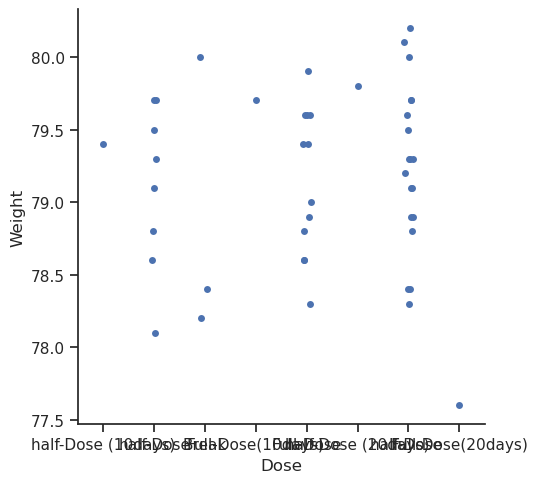

In [44]:
sns.set_theme(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
sns.catplot(x="Dose", y="Weight", data=df2)

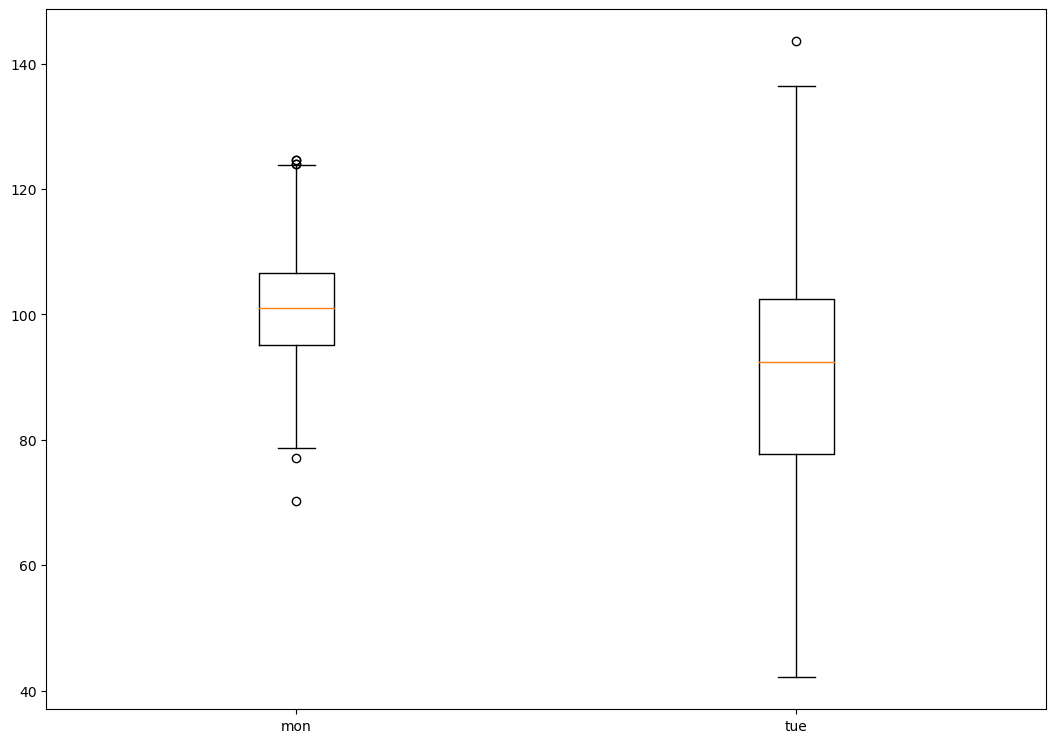

In [20]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)

data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
plt.xticks([1, 2], ['mon', 'tue'])

# show plot
plt.show()

In [10]:
weight = df2['Weight']
BMI = df2['BMI'].astype(float)
muscle = df2['Muscle']
average_weight = statistics.mean(weight)
average_bmi = statistics.mean(BMI)
average_muscle = statistics.mean(muscle)
print(f"The average weight is: {average_weight:.1f} kg")
print(f"The average BMI is: {average_bmi:.1f} kg/m2")
print(f"The average muscle percentage is: {average_muscle:.1f} %")

KeyError: 'Weight'

In [24]:
from bokeh.io import output_file, show
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


import pandas as pd
import numpy as np
import panel as pn
output_notebook()

Loading BokehJS ...

In [25]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import HighContrast3
from bokeh.transform import factor_cmap, factor_mark

def plot_df(x='BMI', y='Weight'):
    p = figure(title='Health data', y_axis_label=f'{y} (cm)', x_axis_label=f'{x} (cm)', toolbar_location=None)
    
    # Creating a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df2)
    
    markers = ['hex', 'square', 'triangle']
    
    # Adding scatter plot with 'species' as hue and colormap
    p.scatter(x=x, 
              y=y, 
              source=source,
              fill_alpha=0.6, 
              size=10)
    
    # Displaying the plot with legend
    show(p)


plot_df()

In [26]:
##########################################################
# !!!!!!!!!! change plot with return p instead of show(p)
#########################################################

def render_plot(x='BMI', y='Weight'):
    p = figure(title='Health project', y_axis_label=f'{y} (cm)', x_axis_label=f'{x} (cm)', toolbar_location=None)
    
    # Creating a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df2)
    
    # Adding scatter plot with 'species' as hue and colormap
    p.scatter(x=x, 
              y=y, 
              source=source, 
              fill_alpha=0.6, 
              size=10)

    
    return p

In [10]:
inter_plot = pn.interact(render_plot, x=columns, y=columns)
inter_plot

NameError: name 'columns' is not defined

In [8]:

##########################################################
# !!!!!!!!!! change plot with return p instead of show(p)
#########################################################

def render_plot(x='sepal_length', y='sepal_width'):
    p = figure(title='iris flowers', y_axis_label=f'{y} (cm)', x_axis_label=f'{x} (cm)', toolbar_location=None)
    
    # Creating a ColumnDataSource from the DataFrame
    source = ColumnDataSource(df)
    
    species = sorted(df.species.unique())
    markers = ['hex', 'square', 'triangle']
    
    # Adding scatter plot with 'species' as hue and colormap
    p.scatter(x=x, 
              y=y, 
              source=source, 
              fill_alpha=0.6, 
              size=10, 
              color=factor_cmap('species', 'HighContrast3', species), 
              marker=factor_mark('species', markers, species), 
              legend_field='species')
    
    # Displaying the plot with legend
    p.legend.location = 'top_right'
    p.legend.title = 'Species'

    
    return p

In [2]:
inter_plot = pn.interact(render_plot, x=columns, y=columns)
inter_plot

NameError: name 'pn' is not defined

In [27]:
import pandas as pd

from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2
from bokeh.transform import factor_cmap

df = autompg2[["class", "hwy"]].rename(columns={"class": "kind"})

kinds = df.kind.unique()

# compute quantiles
qs = df.groupby("kind").hwy.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["kind", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="kind", how="left")

# compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

p = figure(x_range=kinds, tools="", toolbar_location=None,
           title="Highway MPG distribution by vehicle class",
           background_fill_color="#eaefef", y_axis_label="MPG")

# outlier range
whisker = Whisker(base="kind", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 20
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("kind", "TolRainbow7", kinds)
p.vbar("kind", 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
p.vbar("kind", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = df[~df.hwy.between(df.lower, df.upper)]
p.scatter("kind", "hwy", source=outliers, size=6, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

show(p)

In [28]:
autompg2.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,Audi,A4,1.8,1999,4,auto(l5),front,18,29,p,compact
1,2,Audi,A4,1.8,1999,4,manual(m5),front,21,29,p,compact
2,3,Audi,A4,2.0,2008,4,manual(m6),front,20,31,p,compact
3,4,Audi,A4,2.0,2008,4,auto(av),front,21,30,p,compact
4,5,Audi,A4,2.8,1999,6,auto(l5),front,16,26,p,compact
